# Tidal Report
blah blah blah blah

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

In [93]:
filename = 'dataset.txt'
infile = open(filename, 'r') 
'''
#Print the first two lines of the file
print(infile.readline())
print(infile.readline())
'''

#call infile.read()
print(infile.read())

#close the file
infile.close()

 1  8:07  6.57
 1 15:37 -0.39
 2  8:55  5.38
 2 16:25 -1.74
 3  9:45  5.26
 3 17:14 -1.36
 4 10:35  4.13
 4 18:00 -1.15
 5 11:28  3.48
 5 18:46 -1.61
 6 12:22  2.62
 6 19:31  0.05
 7 13:24  1.83
 7 20:16  1.01
 8  3:22  3.57
 8 21:01  0.73
 9  4:07  4.54
 9 21:46  2.17
10  4:50  3.76
10 11:58  2.88
11  5:31  3.90
11 12:56  1.92
12  6:08  4.73
12 13:45  1.74
13  6:47  5.66
13 14:25  0.79
14  7:22  5.33
14 15:00 -0.04
15  7:59  5.23
15 15:34 -1.12
16  8:34  6.67
16 16:08 -0.61
17  9:10  4.74
17 16:41 -0.93
18  9:45  4.69
18 17:12 -1.29
19 10:21  4.20
19 17:45  0.22
20 10:57  3.68
20 18:15  0.26
21 11:38  2.47
21 18:48  0.36
22 12:25  2.59
22 19:20  0.99
23  2:22  4.10
23 19:52  1.87
24  2:58  3.17
24 20:30  1.60
25  3:37  3.71
25 10:44  3.10
26  4:23  4.04
26 11:55  2.49
27  5:15  4.07
27 12:57  2.18
28  6:09  5.93
28 13:50  0.70
29  7:05  6.89
29 14:39  0.21
30  7:58  6.72
30 15:27  0.22
31  8:50  6.77
31 16:10 -1.68
32  9:40  5.77
32 16:52 -1.32
33 10:30  4.35
33 17:34 -0.73
34 11:19  

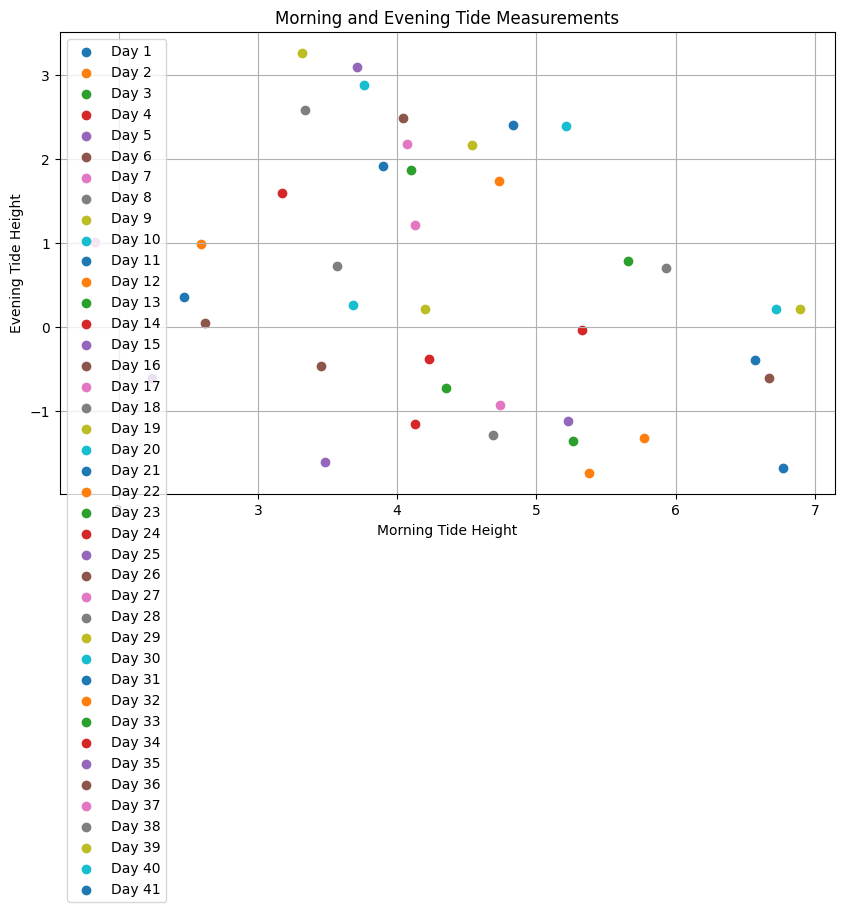

In [94]:
with open('dataset.txt', 'r') as file:
    lines = file.readlines()

# Extract day, time, and height from the lines
data = []
for line in lines:
    items = line.strip().split()
    day, time, height = items
    data.append({'Day': int(day), 'Time': time, 'Height': float(height)})

# Convert the data to Pandas DataFrame
df = pd.DataFrame(data)

df['Measurement'] = df.groupby('Day').cumcount() + 1
df_pivot = df.pivot(index='Day', columns='Measurement', values=['Time', 'Height'])

plt.figure(figsize=(10, 6))
for day in df_pivot.index:
    morning_height = df_pivot.loc[day, ('Height', 1)]
    evening_height = df_pivot.loc[day, ('Height', 2)]
    plt.scatter(morning_height, evening_height, label=f'Day {day}')

plt.xlabel('Morning Tide Height')
plt.ylabel('Evening Tide Height')
plt.title('Morning and Evening Tide Measurements')
plt.legend()
plt.grid(True)
plt.show()
